# Exercício Aula 1  - Thiago Caveglion
Admission_Predict.csv

Exercício Com os dados do arquivo Admission_Predict.csv realize uma classificação dos alunos que possuem chance maior que 0.8 de admissão e dos que possuem chance menor que 0.8. Compare diversos modelos e determine qual seria o melhor a ser implementado. Agora inclusive o SVM.

In [3]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from warnings import filterwarnings


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import recall_score, precision_score, classification_report,confusion_matrix


In [10]:
data = pd.read_csv("Admission_Predict.csv")

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Criando o target

In [5]:
data['target'] =  (data['Chance of Admit '] >= 0.8).astype(int)

data.drop(columns='Chance of Admit ',inplace=True)
                        
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,target
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [6]:
data.drop(columns='Serial No.', inplace=True)

Verificando nulos


In [7]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
target               0
dtype: int64

## Treinando modelos


Modelo: Logistic Regression

Recall: 0.925

Precisão: 0.925


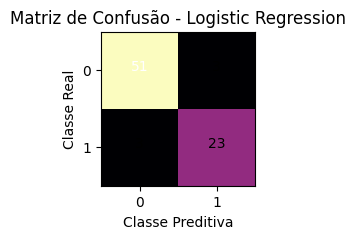


Modelo: Decision Tree

Recall: 0.85

Precisão: 0.85


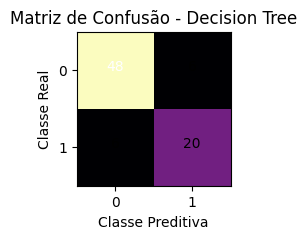


Modelo: Random Forest

Recall: 0.875

Precisão: 0.8784340659340659


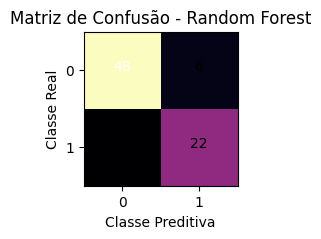


Modelo: SVM

Recall: 0.8875

Precisão: 0.8930527383367138


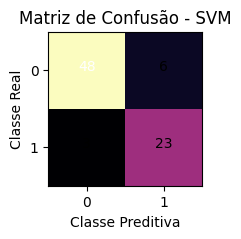

In [9]:
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)

modelos = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    print(f"\nModelo: {nome}")
    print(f"\nRecall: {recall}")
    print(f"\nPrecisão: {precision}")
    
    matriz_confusao = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(2, 2))
    plt.imshow(matriz_confusao,  cmap=plt.cm.magma)
    plt.title(f'Matriz de Confusão - {nome}')

    classes = np.unique(y_test)
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Classe Preditiva')
    plt.ylabel('Classe Real')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(matriz_confusao[i, j]), horizontalalignment="center", color="white" if matriz_confusao[i, j] > matriz_confusao.max() / 2 else "black")

    plt.show()
        


Para nós as metricas importantes em questão são recall e precision, visto que é melhor que um aluno que tirou nota menor seja considerado aprovado do que o contrario. O modelo que apresentou melhores resultados foi o de regressão logística.